# Razmerji med dominantnimi števili
##### Projekt pri predmetu Finančni praktikum
##### Avtorja: Žan Kramar, Brigita Milanič
##### Mentorja: Riste Škrekovski, Janoš Vidali

## Osnovni pojmi
**Graf G** je množica točk v prostoru in povezav med temi točkami. Označimo ga z $G=(V, E)$, kjer je $V(G)$ množica točk in $E(G)$ množica povezav grafa $G$.

**Odprta okolica ali soseščina N** vozlišča $v$ je množica vozlišč, ki je sosedna vozlišču $v$, torej $N(v) =\{ u\in V: uv\in E \}$. **Kartezični produkt grafov** $G_1 = (V_1, E_1)$ in $G_2 = (V_2, E_2)$ je graf $G = G_1 \square G_2$, ki ima množico točk $ V(G) = V_1 \times V_2$ in množico povezav $ E(G)$, kjer je $(u,v)(x,y) \in E(G)$, če je $ u=x $ in $vy \in E(G_2) $ ali $ux \in E(G_1)$ in $v = y$.

**Dominantna množica $ D \subseteq V(G) $ grafa $G$** je takšna množica, da ima vsako vozlišče grafa, ki ni v $D$ $( v \in V(G) \setminus D)$, soseda v $D$. Z drugimi besedami, vsako vozlišče  $v \in V(G)$ je ali  element množice $D$ ali pa je sosednje kakemu vozlišču, ki pripada množici $D$.
**Dominantno število** $\gamma(G) $  je moč najmanjše dominantne množice grafa $G$.

Množica $S$ je **totalno dominantna**, če je $ N(S) = V(G)$, kar pomeni, da je vsako vozlišče iz $ V(G)$ sosednje vozlišču iz množice $S$.
$ \gamma_t $ označujemo **totalno dominantno število**, ki predstavlja velikost najmanjše totalno dominantne množice.

Naj bo $G=(V, E)$ graf in $f: V \to P (\{1,2\dots,k\})$ funkcija, ki vsakemu vozlišču iz $V$ priredi množico barv iz $ \{1,2\dots,k\}$. Če za vsak $v \in V$ za katerega je $ f(v) = \emptyset $ velja $ \bigcup_{u \in N(v) } f(u) = \{1,2\dots,k\}$ potem f imenujemo **k-mavrična dominantna funkcija** grafa $G$, krajše kRDF funkcija. **Težo $w(f)$** funkcije f, definiramo z $w(f) = \sum_{v \in V} \mid f(v)\mid$. Najmanjša vrednost mavrične dominantne funkcije grafa $G$ se imenuje **k-mavrično dominanto število**, in jo označimo z $\gamma_{rk} (g)$.

Za graf $G$ je **k-mavrično totalno dominantna funkcija** f, krajše kRTDF,  k-mavrična dominantna funkcija s pogojem, da podgraf grafa G, ki ga določa množica $\{v \in V(G) \mid f(v) \neq \emptyset \}$ nima izoliranih vozlišč. Teža funkcije kRTDF je  $w(f) = \sum_{v \in V} \mid f(v)\mid$. Za dan graf G, imenujemo težo najmanjše kRTDF funkcije **k-mavrično totalno dominantno število**, in jo označimo z  $\gamma_{rkt} (g)$. 

## Problema
#### 1.Problem
Najdi funkcijo $b(k)$, da za $k \geqq 3$, za katero je dana neenakost ozka:
\begin{equation}
  \gamma_{krt}(G) \geqq b(k) \cdot \gamma_t
\end{equation}

Z drugimi besedami, najdi $b(k) = \inf_G \frac{\gamma_{krt}(G)}{\gamma_t(G)}$.

#### 2. Problem
Najdi funkcijo $a(k)$, da za $k \geqq 3$, za katero je dana neenakost ozka:
\begin{equation}
   a(k)\cdot\gamma_{kr}(G)\geqq\gamma_{krt}(G)
\end{equation}

Z drugimi besedami, najdi $a(k) = \sup_G \frac{\gamma_{krt}(G)}{\gamma_{kr}(G)}$.


## Reševanje naloge


Najprej sva podrobneje analizirala grafe do vključno 8 vozlišč in poskusila najti vzorce. Funkcijo sva pognala na vseh možnih grafih posamezne velikosti in postopoma povečevala k. V drugem delu pa sva generirala večje grafe različnih velikost in raziskovala odvisnost od k. Pogledala sva tudi kako se supremum oz infimum spremeni, če grafu odstranim oz. dodamo vozlišče ali povezavo.
Najprej sva definirala *funkcijo dominacija*, ki nam je izračuna za željeno število k in graf totalno dominacijo, k-mavrično število in totalno k-mavrično dominacijo. Funkcijo sva nato uporabila v *funkciji razmerje*, ki nam izračuna infiumum oz. supremum. Funkcija razmerje sprejme parameter v, s katerim določimo število vozlišč grafa. Izračuna nam kvocient med dominacijami za vsak graf velikosti v in za vsako število k med 2 in številom vozlišč.
Rezultate sva s pomočjo *funkcije shrani* shranila v datoteko *grafi.txt*. Ta nama je tudi olajšala delo, da nisva funkcije razmerje za vsako število vozlišč posebej poganjala, saj ji povemo interval števil za katere naj pokliče funkcijo razmerje. Poleg tega si shrani tudi grafe za katere je dosežen infimum oz. supremum. Če želimo, da se nam izriše graf z v vozlišči in k-mavričnim številom pri katerem je dosežen supremum/ infimum pokličemo *funkcijo graf_sup* oz. *funkcijo graf_inf*.



In [1]:
import json

def dominacija(G,k):
    t = G.dominating_set(value_only= True, total = True)
    kr = (G.cartesian_product(graphs.CompleteGraph(k))).dominating_set(value_only=True)
    krt = (G.cartesian_product(graphs.CompleteGraph(k))).dominating_set(value_only=True, total=True)
    return [t,kr,krt]

def razmerje(v):
    sez_inf = []
    sez_sup = []
    grafi_inf = []
    grafi_sup = []
    for i in range(2,v+1):
        a = 11111111
        b= 0
        sez_inf.append([i,a])
        sez_sup.append([i,b])
        grafi_inf.append([0])
        grafi_sup.append([0])
        for G in graphs(v):
            if G.is_connected():
                dom = dominacija(G,i)
                if a > dom[2]/dom[0]:
                    a = dom[2]/dom[0]
                    sez_inf[i-2] = [i,a]
                    grafi_inf[i-2] = G.sparse6_string()
                if b < dom[2]/dom[1]:
                    b = dom[2]/dom[1]
                    sez_sup[i-2] = [i,b]
                    grafi_sup[i-2]=G.sparse6_string()

    return [sez_inf,sez_sup],grafi_inf, grafi_sup

def shrani(i,j):
    o= open('grafi.txt','w')
    for t in range(i,j):
        r,graf_i,graf_s = razmerje(t)
        o.write(str(r))
        o.write('\n')
        with open('grafi_inf{}.json'.format(t),'w') as i :
            json.dump(graf_i,i)
        with open('grafi_sup{}.json'.format(t),'w')as s:
            json.dump(graf_s,s)
    o.close()
    
def graf_sup(v,k):
    with open("grafi_sup{}.json".format(v)) as i:
        graf_sup = json.load(i)
        G = Graph(str(graf_sup[k-2]))
    return G

def graf_inf(v,k):
    with open("grafi_inf{}.json".format(v)) as i:
        graf_inf = json.load(i)
        H = Graph(str(graf_inf[k-2]))
    return H

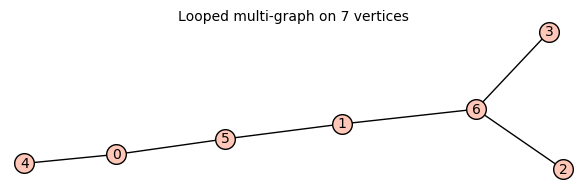

In [11]:
graf_inf(7,5)

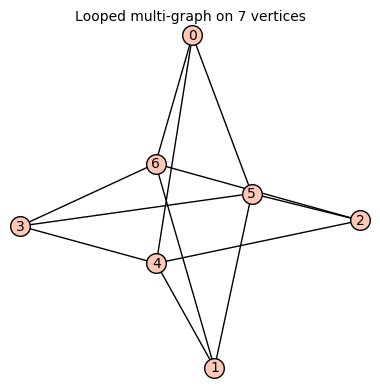

In [4]:
graf_sup(7,3)

Tako imamo zdaj v datoteki grafi.txt shranjene minimume in maksimume kvocientov dominacij. Pri iskanju infimuma vidimo, da je za k = 2 za vsak graf infimum enak 1. Če se omejimo na posamezno velikost grafa in povečujemo k opazimo, da z naraščanjem k tudi infimum na začetku narašča, a se čez čas ne spreminja več.
Če pa fiksiramo k in povečujemo velikost grafa pa iz podatkov ni razvidnih vzorcev. Mogoče le za k=4 bi lahko trdili, da je infimum enak 3/2.

Pri drugem problemu je za k = 2 supremum enak 2. Če fiksiramo vozlišča in povečujemo k supremum pada in doseže 1, ko je k enak številu vozlišč grafa. Če pa je k fiksen in povečujemo vozlišča supremum narašča proti 2.
Sumimo, da se bo supremum nahajal na intervalu [3/2,2]

Ko sva si ustvarila osnovno idejo sva analizirala grafe na večjih vozliščih. Najprej sva definirala *funkcijo vrednosti*,  ki nam za parameter v in dani graf v seznam shrani k-mavrično dominantno število in totalno k-mavrično dominantno število grafa za k na intervalu [3,v]. Definirala sva pomožni funkciji *deli_elemente* in *deli_seznam*, ki nam izračunajo razmerja med dominantnimi števili  in *funkciji primerjaj_sup* in *primerjaj_inf*, ki primerjajo razmerja med seboj in shranijo najmanjše oz. največje število. Pri *funkciji zunanja* izberemo število ponovitev, ki naj jih naredi funkcija in maksimalno število vozlišč, ki naj jih ima graf. Funkcija generira slučajen graf za katerega izračuna iskana razmerja in jih primerja z (do tega trenutka) najboljšimi izračunanimi razmerji.  Kot rezultat nam vrne seznam seznamov minimuma in maksimuma razmerji.




In [1]:
def vrednosti(g,v):
    sez_kr = []
    sez_krt = []
    if g.is_connected():
        for i in range(3,v):
            f = g.cartesian_product(graphs.CompleteGraph(i))
            sez_kr.append(f.dominating_set(value_only=True))
            sez_krt.append(f.dominating_set(value_only = True, total=True))
    return[sez_kr, sez_krt]

In [2]:
def deli_elemente(seznam, st):
    return [x / st for x in seznam]

In [3]:
def deli_seznam(seznam1, seznam2):
    return [int(b) / int(m) for b,m in zip(seznam1, seznam2)]

In [4]:
def primerjaj_sup(sez1, sez2):
    for i in range(0,len(sez2)):
        if sez1[i] < sez2[i]:
            sez1[i] = sez2[i]
    return sez1

In [5]:
def primerjaj_inf(sez1, sez2):
    for i in range(0,len(sez2)):
        if sez1[i] > sez2[i]:
            sez1[i] = sez2[i]
    return sez1

In [6]:
def zunanja (ponovitve, vozlisca):
    st = 0
    razmerje1 = [1110,1110,1110,1110,1110,1110,1111,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110]
    razmerje2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(0,ponovitve):
        no=randrange(4,vozlisca)
        g = graphs.RandomGNP(no, 0.5)
        if g.is_connected():
            [sez_kr, sez_krt] = vrednosti(g,len(razmerje1))
            t = g.dominating_set(value_only=True, total = True)
            b = deli_elemente(sez_krt, t)
            a = deli_seznam(sez_krt, sez_kr)
            razmerje1 = primerjaj_inf(razmerje1, b)
            razmerje2 = primerjaj_sup(razmerje2, a)
            st += 1
            print ponovitve - st
    return [a,b]

Nato naju je zanimalo kako se razmerje med dominacijami spremeni, če grafu dodamo vozlišče in povezavo ali dodamo povezavo ali odstranimo povezavo ali vozlišče. Spremembo grafa sva naredila s pomočjo *funkcije sosed*, ki naključno naredi eno (če funkciji ne s pomočjo parametra k določimo drugače) izmed prej omenjenih operacij na grafu. Definirala sva tudi pomožni *funkciji kriterij_a** in kriterij_b*, ki izračunata kvocient dominantnih števil. *Funkcija sim_ann_a*  sprejme pet parametrov n, p, k, ponovitve in i. S parametrom n ji povemo koliko vozlišč naj ima naključni graf in s p pa kakšna naj bo verjetnost povezave.  S parametrom k določimo število barv in kot ime pove s parametrom ponovitve določimo število ponovitev funkcije. Z neobveznim parametrom i določimo koliko sprememb grafa hkrati naj naredi funkcija sosed.  Funkcija izračuna razliko razmerja dominantnih števil za prvotni graf in spremenjeni graf.  V primeru, da je razlika pozitivna prvotni graf nadomesti s spremenjenim, v nasprotnem primeru pa naključno ohrani oz. spremeni graf.  Kot rezultat vrne zadnje shranjen graf in razmerje dominantnih števil tega grafa. Podobno deluje *funkcija sim_ann_b*. Pomagala sva si še s *funkcijo test_seznam*, ki ima enake parametre kot prejšnji funkciji, razen namesto parametra k je zdaj seznam števil.  To pa zato, ker za vsako število v seznamu pokličemo prej omenjeni funkciji in to število vzamemo kot parameter k.  Funkcija vrne seznam rezultatov funkcij sim_ann_a in sim_ann_b.

In [1]:
import random
import json

def sosed(h, k=1):
    for i in range(k):
        g = Graph(h)
        while True:
            c =random.random()
            print c
            if c <=0.25:
                b = len(g.vertices())
                a = randrange(0,b)
                g.add_vertex(name = b)
                g.add_edge(a,b)
                h = g
                break
            elif c <= 0.5 and c > 0.25:
                a = g.complement().random_edge()
                g.add_edge(a)
                h = g
                break
            elif c > 0.75:
                a = g.random_edge()
                g.delete_edge(a)
                if g.is_connected():
                    h = g
                    break
                else:
                    g.add_edge(a)
                    continue
            else:
                a = g.random_vertex()
                g.delete_vertex(a)
                if g.is_connected():
                    h = g
                    break
                else:
                    g.add_vertex(a)
                    continue
    return h

def kriterij_a(g, i):
    return (g.cartesian_product(graphs.CompleteGraph(i))).dominating_set(value_only = True, total = True)/RR((g.cartesian_product(graphs.CompleteGraph(i))).dominating_set(value_only = True))

def kriterij_b(g,i):
    return (g.cartesian_product(graphs.CompleteGraph(i))).dominating_set(value_only = True, total = True)/RR(g.dominating_set(value_only=True, total = True))

def sim_ann_a(n, p, k, ponovitve, i=1):
    g = graphs.RandomGNP(n,p)
    najbolsi = g
    vrednost = 0
    nek = RR(kriterij_a(g,k))
    for m in range(ponovitve):
        t = ponovitve/(m+1)
        sos = sosed(g, i)
        razlika = nek - RR(kriterij_a(sos,k))
        print m
        if razlika > 0:
            najbolsi = sos
            g = sos
            nek = nek - razlika
            vrednost = nek
        elif exp((razlika * 100)/t) > random.random():
            g = sos
            nek = RR(kriterij_a(g,k))
    return najbolsi.sparse6_string(), float(vrednost)

def sim_ann_b(n, p, k, ponovitve, i=1):
    g = graphs.RandomGNP(n,p)
    najbolsi = g
    vrednost = 0
    nek = RR(kriterij_b(g,k))
    for m in range(ponovitve):
        t = ponovitve/(m+1)
        sos = sosed(g)
        razlika = RR(kriterij_b(sos,k)) - nek
        print m
        if razlika > 0:
            g = sos
            najbolsi = sos
            nek = razlika + nek
            vrednost = nek
        elif exp((razlika * 100)/t) > random.random():
            g = sos
            nek = RR(kriterij_b(g,k))
    return najbolsi.sparse6_string(), float(vrednost)


def test_seznam(n, p, sez, ponovitve, i=1):
    podatki = []
    for k in sez:
        graf_a, stevilo_a = sim_ann_a(n,p, k, ponovitve)
        graf_b, stevilo_b = sim_ann_b(n,p, k, ponovitve)
        podatki.append([graf_a, stevilo_a, graf_b, stevilo_b])
    	return podatki


def zapisi(podatki, i):
    with open("rezultati{}.json".format(i), "w") as f:
        json.dump(podatki, f)

Glede na rezultate izračunane z zgornjimi funkcijami bi za funkcijo a(k) predlagala kar kot konstanto 1, saj je za vsak k obstajal graf, pri katerem je bilo inf razmerja enak 1. 
Za funkcijo b(k) pa sva na podanih rezultatih uporabila linearno aproksimacijo, in dobila funkcijo b(k) = 0.8 * k + 1. Za izračun je bila uporabljena vgrajena funkcija v RStudiu lm.


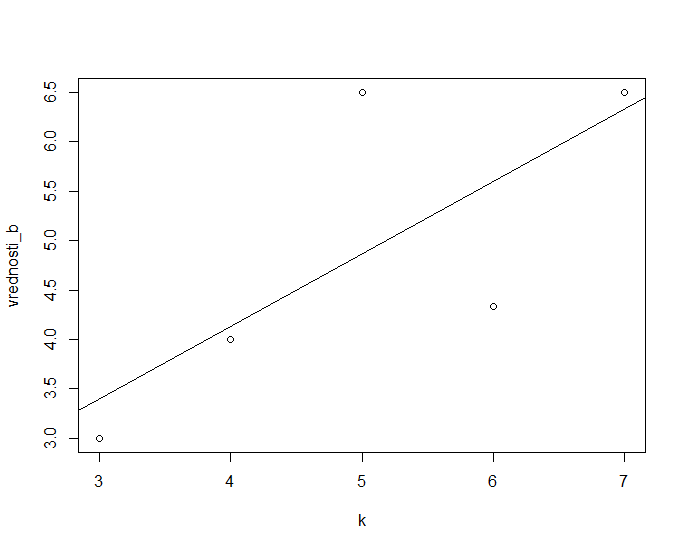

Spodaj sta izrisana grafa H, za katerega smo dobili največji a, in graf G, za katerega je bil minimum enak 1.

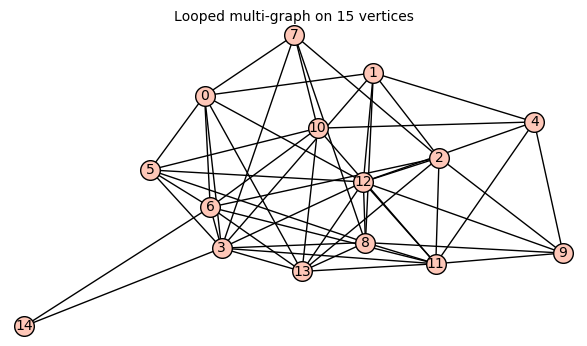

In [22]:
with open("rezultati7.json") as i:
        graf= json.load(i)
        H = Graph(str(graf[0][2]))
        G = Graph(str(graf[0][0]))
H

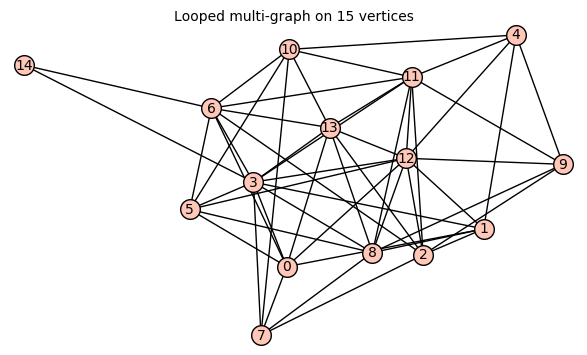

In [23]:
G